In [1]:
# The data set I used contains details of a bank's customers.

# The target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) 
# or s/he continues to be a customer.

# In order to predict target variables, I will use sklearn classification algorithms:

#Logistic Regression Classification
# K-Nearest Neighbour (KNN) Classification
# Support Vector Machine (SVM) Classification
# Naive Bayes Classification
# Decision Tree Classification
# Random Forest Classification
# After implementing each model, I used score and confusion matrix methods to compare models

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt 
import os

In [3]:
data = pd.read_csv('Churn_Modelling.csv')

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
# we don't need some of the columns for our analysis, like customer ID, surname, etc.
data.drop(['RowNumber', 'CustomerId', 'Surname', 'Geography'], axis=1, inplace=True)

# we will change customers' gender from Male/Female to 1/0
data.Gender = [1 if each == 'Male' else 0 for each in data.Gender]

data.sample(5)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
8660,535,0,27,6,0.00,2,0,1,49775.58,0
2763,706,0,47,6,120621.89,1,1,1,140803.70,0
2916,651,1,56,2,0.00,1,1,0,114522.68,1
8013,650,1,32,2,84906.45,1,1,0,163216.48,0
8146,717,1,48,7,123764.95,1,1,1,169952.82,0


0    7963
1    2037
Name: Exited, dtype: int64

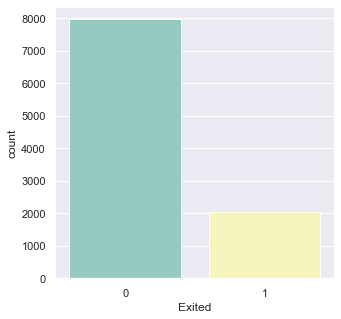

In [7]:
# Question arises : How many of the customers left the bank?
plt.figure(figsize=[5,5])
sns.set(style='darkgrid')
ax = sns.countplot(x='Exited', data=data, palette='Set3')
data.loc[:,'Exited'].value_counts()

In [8]:
# 2. SEPARETING FEATURES AND TARGET
# Now separete target feature (y) from other features (x_data).

y = data.Exited.values
x_data = data.drop(['Exited'], axis=1)

x_data.describe()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881
std,96.653299,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818
min,350.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000
25%,584.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000
50%,652.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000
75%,718.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500
max,850.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000


In [9]:
# I can see the x_data features has a large scale of numbers. So I need to normalize all the features between 0 and 1.

In [10]:
# 3. NORMALIZATION PROCESS

x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data))
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0.538,0.0,0.324324,0.2,0.000000,0.000000,1.0,1.0,0.506735
1,0.516,0.0,0.310811,0.1,0.334031,0.000000,0.0,1.0,0.562709
2,0.304,0.0,0.324324,0.8,0.636357,0.666667,1.0,0.0,0.569654
3,0.698,0.0,0.283784,0.1,0.000000,0.333333,0.0,0.0,0.469120
4,1.000,0.0,0.337838,0.2,0.500246,0.000000,1.0,1.0,0.395400


In [11]:
# 4. SPLITTING DATA FOR TRAINING AND TESTING
# I am going to split my data set into as train (x_train, y_train) and test (x_test, y_test) datas.
# Then I am going to teach my machine learning algorithms by using trainig data set.
# Later I will use my trained model to predict my test data (y_pred).
# Finally I will compare my predictions (y_pred) with my test data (y_test).

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=7)

print('x_train shape: ', x_train.shape)
print('y_train shape: ', y_train.shape)
print('x_test shape: ', x_test.shape)
print('y_test shape: ', y_test.shape)

x_train shape:  (9000, 9)
y_train shape:  (9000,)
x_test shape:  (1000, 9)
y_test shape:  (1000,)


In [12]:
# 5. LOGISTIC REGRESSION CLASSIFICATION:

In [13]:
from sklearn.linear_model import LogisticRegression

# Defining the model
lr = LogisticRegression()

# Training the model:
lr.fit(x_train, y_train)

# Predicting target values by using x_test and our model:
y_pred0 = lr.predict(x_test)

D:\anaconda_folder\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


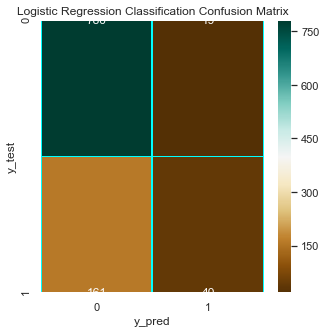

In [14]:
# Confusion matrix for visulalization of our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
lr_cm = confusion_matrix(y_test, y_pred0)

#Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(lr_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [15]:
score_lr = lr.score(x_test, y_test)
print(score_lr)

0.82


In [16]:
# 6. KNN CLASSIFICATION ALGORITHM:

In [17]:
from sklearn.neighbors import KNeighborsClassifier

# Defining the model with a k number of 13:
knn = KNeighborsClassifier(n_neighbors=13)

# Training the model:
knn.fit(x_train, y_train)

# Predicting target values by using x_test and our model:
y_pred1 = knn.predict(x_test)

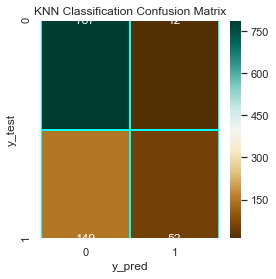

In [18]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
knn_cm = confusion_matrix(y_test, y_pred1)

# Visualization:
f, ax = plt.subplots(figsize=(4,4))
sns.heatmap(knn_cm, annot=True, linewidth=1, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [19]:
score_knn = knn.score(x_test, y_test)
print(score_knn)

0.839


In [20]:
# 7. SUPPORT VECTOR MACHINE (SVM) ALGORITHM:
# I will use the same x_train and y_train data sets to teach a SVM model.

In [21]:
from sklearn.svm import SVC

# Defining SVM model
svm = SVC(random_state=2)

# Training model:
svm.fit(x_train, y_train)

# Predicting target values by using x_test and our model:
y_pred2 = svm.predict(x_test)

D:\anaconda_folder\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


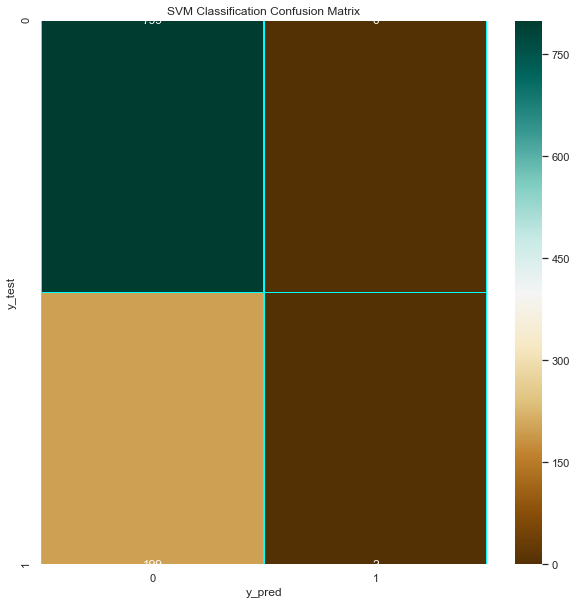

In [22]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
svm_cm = confusion_matrix(y_test, y_pred2)

# Visualization:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(svm_cm, annot=True, linewidth=1.0, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [23]:
score_svm = svm.score(x_test, y_test)
print(score_svm)

0.801


In [24]:
# 8. NAIVE BAYES ALGORITHM:

In [25]:
from sklearn.naive_bayes import GaussianNB

# Defining model:
nb = GaussianNB()

# Training the model:
nb.fit(x_train, y_train)

# Predicting:
y_pred3 = nb.predict(x_test)

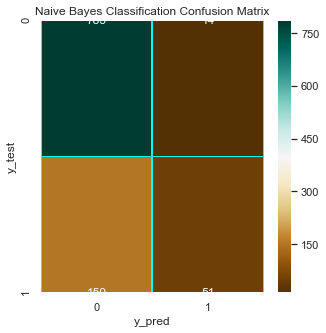

In [26]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
nb_cm = confusion_matrix(y_test, y_pred3)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nb_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [27]:
score_nb = nb.score(x_test, y_test)
print(score_nb)

0.836


In [28]:
# 9. DECISION TREE ALGORITHM:

In [29]:
from sklearn.tree import DecisionTreeClassifier

# Defining the model:
dt = DecisionTreeClassifier()

# Training:
dt.fit(x_train, y_train)

# Predicting:
y_pred4 = dt.predict(x_test)

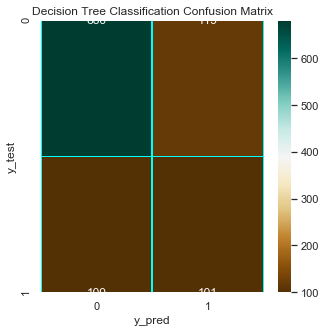

In [30]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
dt_cm = confusion_matrix(y_test, y_pred4)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dt_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [31]:
score_dt = dt.score(x_test, y_test)
print(score_dt)

0.781


In [32]:
# 10. RANDOM FOREST CLASSIFICATION ALGORITHM:

In [33]:
from sklearn.ensemble import RandomForestClassifier

# Defining:
rf = RandomForestClassifier(n_estimators=100, random_state=3)

# Training:
rf.fit(x_train, y_train)

# Predicting:
y_pred5 = rf.predict(x_test)

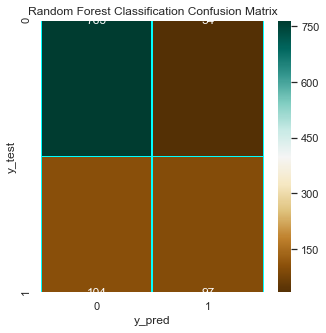

In [34]:
# Confusion matrix for visualization our prediction accuracy:
from sklearn.metrics import confusion_matrix

# Creating the confusion matrix:
rf_cm = confusion_matrix(y_test, y_pred5)

# Visualization:
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rf_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax, cmap='BrBG')
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('y_pred')
plt.ylabel('y_test')
plt.show()

In [35]:
score_rf = rf.score(x_test, y_test)
print(score_rf)

0.862


In [36]:
# 11. COMPARISON OF ALGORITHMS:
# Now it's time to compare our models.

In [37]:
# First of all compare the accuracies:

data_scores = pd.Series([score_lr, score_knn, score_svm, score_nb, score_dt, score_rf], 
                        index=['logistic_regression_score', 'knn_score', 'svm_score', 'naive_bayes_score',
                               'decision_tree_score', 'random_forest_score']) 
data_scores

logistic_regression_score    0.820
knn_score                    0.839
svm_score                    0.801
naive_bayes_score            0.836
decision_tree_score          0.781
random_forest_score          0.862
dtype: float64

In [38]:
# From the accuracy comparison I can see random forest classification gave the best result.

# Now I want to see y_test and my models' y_pred values manually:

d = {'y_test': y_test, 'log_reg_pred': y_pred0,'knn_prediction': y_pred1, 
     'svm_prediction': y_pred2, 'naive_bayes_prediction': y_pred3, 
     'decision_tree_prediction': y_pred4, 'random_forest_prediction': y_pred5}
data01 = pd.DataFrame(data=d)
data01.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
y_test,1,0,0,0,0,0,0,0,0,1,...,1,0,0,0,1,0,0,1,0,0
log_reg_pred,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
knn_prediction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
svm_prediction,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
naive_bayes_prediction,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
decision_tree_prediction,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
random_forest_prediction,1,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


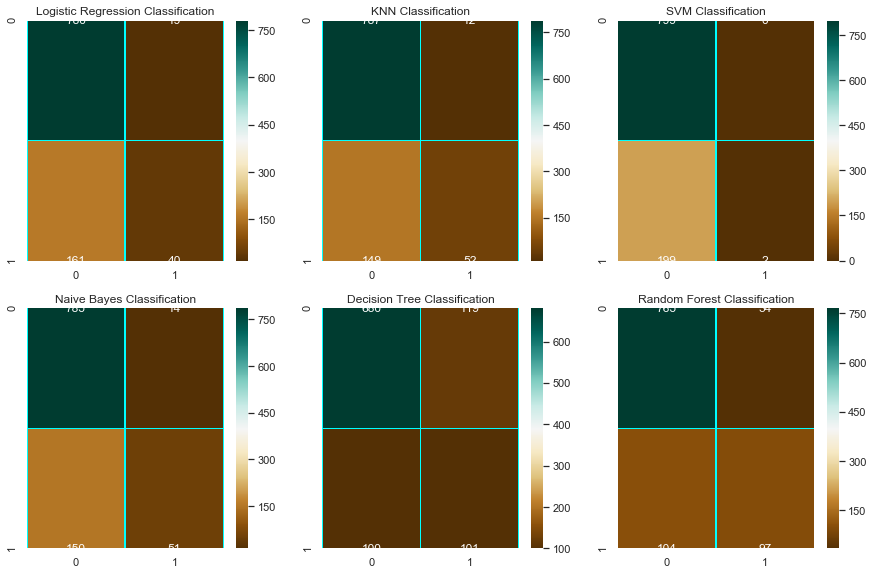

In [39]:
# Finally I want to show my models' confusion matrixes side by side:

fig = plt.figure(figsize=(15,15))

ax1 = fig.add_subplot(3, 3, 1) # row, column, position
ax1.set_title('Logistic Regression Classification')

ax2 = fig.add_subplot(3, 3, 2) # row, column, position
ax2.set_title('KNN Classification')

ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('SVM Classification')

ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Naive Bayes Classification')

ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Decision Tree Classification')

ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('Random Forest Classification')

sns.heatmap(data=lr_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax1, cmap='BrBG')
sns.heatmap(data=knn_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax2, cmap='BrBG')   
sns.heatmap(data=svm_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax3, cmap='BrBG')
sns.heatmap(data=nb_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax4, cmap='BrBG')
sns.heatmap(data=dt_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax5, cmap='BrBG')
sns.heatmap(data=rf_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='.0f', ax=ax6, cmap='BrBG')
plt.show()